In [200]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dx = 5
dy = 5

Lx = 100
Ly = 100

class node:
    def __init__(self):
        
        self.node_pos = None
        self.Cell_size_x = 5
        self.Cell_size_y = 5
        self.grid_face = None
        self.node_type = None 

        self.Gx = None # Location along the x axis
        self.Gy = None # Location along the y axis

        self.edge_color = "blue"

        self.edge_node_pos = []
        #    1
        # 0|   | 2
        #    3

In [202]:
mesh = np.array([[node() for x in range(int(Lx/dx))] for y in range(int(Ly/dy))])
mesh.shape

(20, 20)

In [203]:
# Equidistant mesh
x_val = 0
y_val = 0

# the origin of the x and y axis is on the bottom left
for y in range(mesh.shape[0]):
    for x in range(mesh.shape[1]):
        cell = mesh[y][x]
        cell.Gx = x_val
        cell.Gy = y_val

        x_val += cell.Cell_size_x
    x_val = 0
    y_val += cell.Cell_size_y

In [215]:
def stretch_one_point_gradual(arr, index, percent):
    """
    Stretch or shrink one point by `percent`, and reduce others progressively.
    Total sum remains the same. Keeps the index position intact.
    """
    arr = np.array(arr, dtype=float)
    total = arr.sum()
    n = len(arr)

    # Step 1: Compute new value for chosen index
    new_value = arr[index] * (1 + percent / 100.0)

    # Step 2: Remaining total for other values
    leftover = total - new_value

    if leftover < 0:
        raise ValueError("Percent too negative: total cannot be preserved.")

    # Step 3: Progressive weights for others (based on position)
    weights = np.arange(1, n + 1, dtype=float)
    weights[index] = 0  # exclude chosen index

    # Step 4: Distribute leftover according to weights
    factor = leftover / weights.sum()
    for i in range(n):
        if i != index:
            arr[i] = factor * weights[i]
    arr[index] = new_value

    return arr

# Example usage
x_axis = [5, 5, 5, 5, 5, 5]
result = stretch_one_point_gradual(x_axis, index=-1, percent=-90)  # Stretch 3rd element by {percent}%
print(result)
print("Sum:", sum(result))

[1.96666667 3.93333333 5.9        7.86666667 9.83333333 0.5       ]
Sum: 29.999999999999996


In [223]:
5 * ((90)/100)

4.5

In [288]:
import numpy as np

def strech(axis, index, degrade):
    axis = np.array(axis, dtype=float)
    total = axis.sum()

    # Step 1: shrink chosen index
    new_value = axis[index] * ((100 - degrade) / 100.0)

    # Step 2: leftover
    leftover = total - new_value

    # Step 3: distribute leftover based on distance from index
    n = len(axis)
    distances = np.array([abs(i - index) for i in range(n)], dtype=float)
    weights = (distances)    # farther gets more
    weights[index] = 0

    factor = leftover / weights.sum()

    new_axis = np.zeros_like(axis)
    for i in range(n):
        if i == index:
            new_axis[i] = new_value
        else:
            new_axis[i] = factor * weights[i]

    return new_axis.tolist()

l = [5,5,5,5,5]
print(sum(l))
s = strech(l, 0, degrade=90)
s

25


[0.5, 2.45, 4.9, 7.3500000000000005, 9.8]

In [216]:
degrade = -90
result = stretch_one_point_gradual(test_x, index=-1, percent=degrade)
result

array([0.52368421, 1.04736842, 1.57105263, 2.09473684, 2.61842105,
       3.14210526, 3.66578947, 4.18947368, 4.71315789, 5.23684211,
       5.76052632, 6.28421053, 6.80789474, 7.33157895, 7.85526316,
       8.37894737, 8.90263158, 9.42631579, 9.95      , 0.5       ])

In [ ]:
degrade = -90
result = stretch_one_point_gradual(test_x, index=-1, percent=degrade)
result

In [217]:
for y in range(mesh.shape[0]):
    # Extract current row cell sizes
    x_array_size = [mesh[y][x].Cell_size_x for x in range(mesh.shape[1])]

    # Stretch chosen index
    stretched_array_size = stretch_one_point_gradual(x_array_size, index=-1, percent=degrade)

    # Assign back the new sizes and recompute bottom-left
    gx_temp = 0
    for x in range(mesh.shape[1]):
        mesh[y][x].Cell_size_x = stretched_array_size[x]
        mesh[y][x].Gx = gx_temp   # bottom-left of this cell
        gx_temp += stretched_array_size[x]

for x in range(mesh.shape[1]):
    # Extract current column cell sizes
    y_array_size = [mesh[y][x].Cell_size_y for y in range(mesh.shape[0])]

    # Stretch chosen index (example: bottommost index=0)
    stretched_array_size = stretch_one_point_gradual(y_array_size, index=-1, percent=degrade)

    # Assign back and recompute bottom-left Gy
    gy_temp = 0
    for y in range(mesh.shape[0]):
        mesh[y][x].Cell_size_y = stretched_array_size[y]
        mesh[y][x].Gy = gy_temp
        gy_temp += stretched_array_size[y]

In [218]:
[mesh[0][i].Cell_size_x for i in range(mesh.shape[1])]

[0.5260526315789473,
 1.0521052631578947,
 1.578157894736842,
 2.1042105263157893,
 2.6302631578947366,
 3.156315789473684,
 3.6823684210526313,
 4.208421052631579,
 4.734473684210526,
 5.260526315789473,
 5.786578947368421,
 6.312631578947368,
 6.838684210526315,
 7.364736842105263,
 7.89078947368421,
 8.416842105263157,
 8.942894736842105,
 9.468947368421052,
 9.995,
 0.049999999999999975]

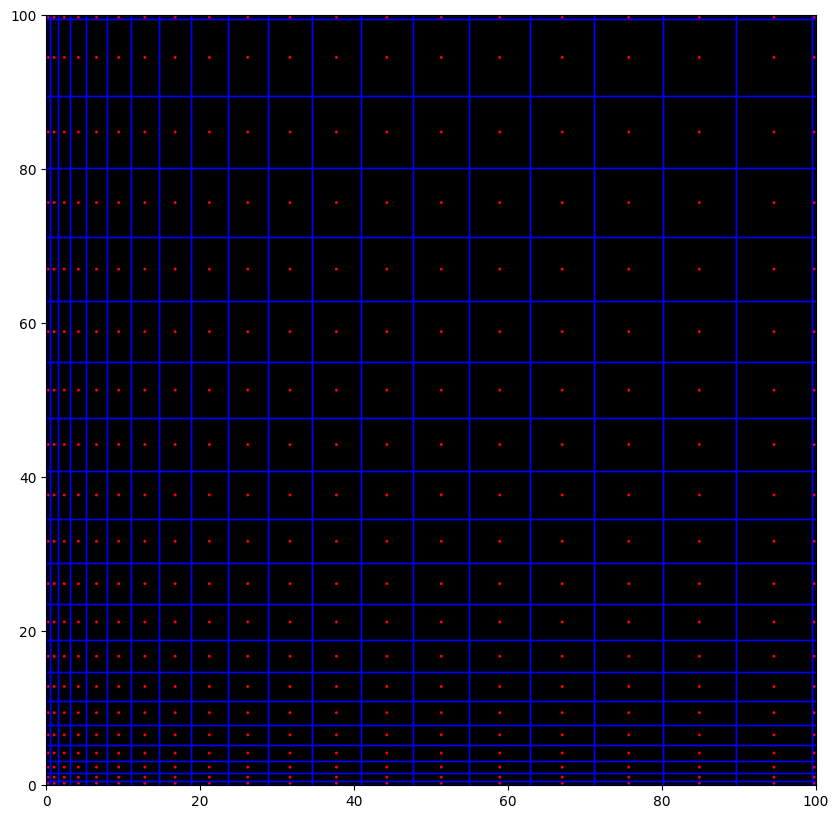

In [209]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_size_y = Ly
plot_size_x = Lx

canvas = np.ones((int(plot_size_y), int(plot_size_x)))
ax.imshow(canvas, origin='lower', cmap='gray',
          extent=[0, plot_size_x, 0, plot_size_y])

for y in range(mesh.shape[0]):
    for x in range(mesh.shape[1]):
        cell = mesh[y][x]

        circle = plt.Circle(
                (cell.Gx + cell.Cell_size_x / 2, cell.Gy + cell.Cell_size_y / 2),
                0.1, color='red', fill=False
            )
        ax.add_patch(circle)

        rect = plt.Rectangle((cell.Gx, cell.Gy), cell.Cell_size_x, cell.Cell_size_y, linewidth=1, edgecolor=cell.edge_color, facecolor='none')
        ax.add_patch(rect)